<a href="https://colab.research.google.com/github/cypherkrish/Deeplearning/blob/main/AutoEncoder_PCA_LDA_tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 8s 24ms/step - loss: 0.2769 - val_loss: 0.1910
Epoch 2/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1716 - val_loss: 0.1534
Epoch 3/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1439 - val_loss: 0.1340
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1286 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1181 - val_loss: 0.1129
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1110 - val_loss: 0.1068
Epoch 7/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1058 - val_loss: 0.1024
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1019 - val_loss: 0.0992
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0992 - val_loss: 0.0968
Epoch 10/50
235/235 [=====

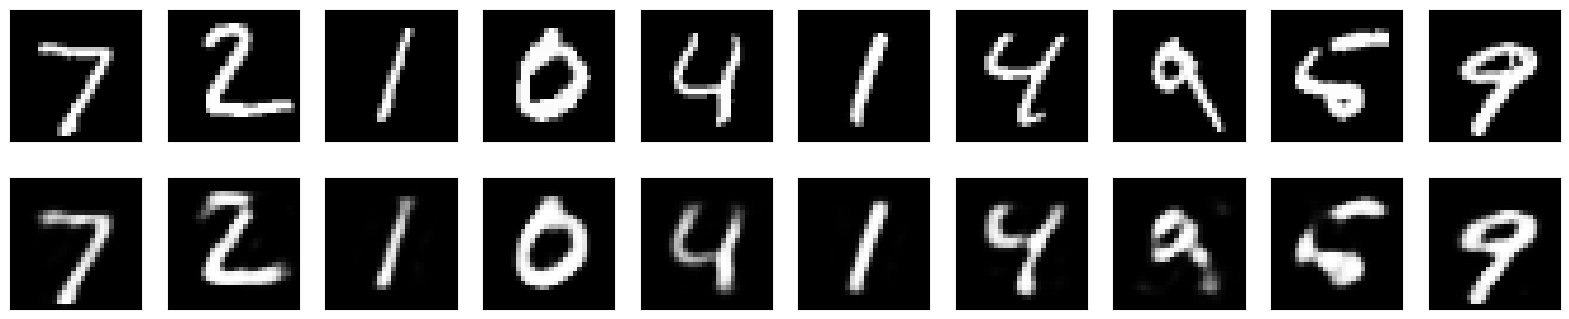

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to [0, 1] range and flatten it
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the size of our encoded representations
encoding_dim = 32

# Input placeholder
input_img = Input(shape=(784,))
# Encoded representation
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Decoded representation
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model
encoder = Model(input_img, encoded)

# Decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Visualize the original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


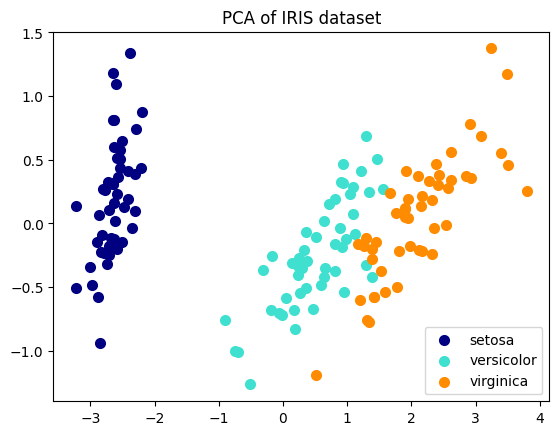

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# Plot the result
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
target_names = iris.target_names
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, lw=2, label=target_name)
plt.title('PCA of IRIS dataset')
plt.legend()
plt.show()


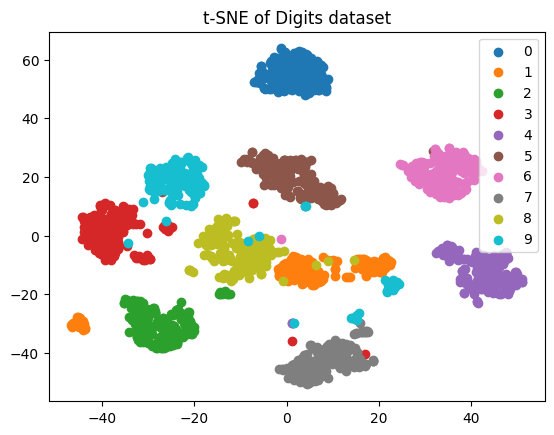

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the result
plt.figure()
for i in range(10):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=str(i))
plt.title('t-SNE of Digits dataset')
plt.legend()
plt.show()


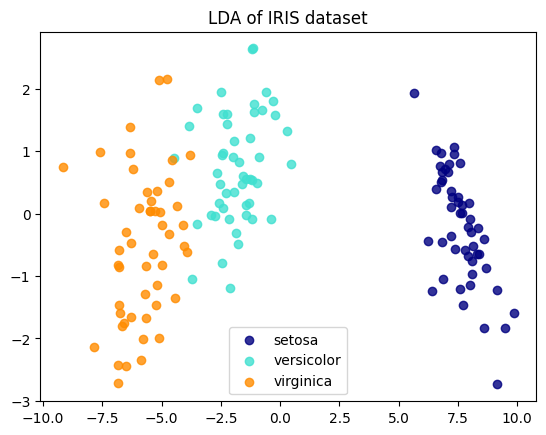

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_r = lda.fit_transform(X, y)

# Plot the result
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
target_names = iris.target_names
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=0.8, color=color, label=target_name)
plt.title('LDA of IRIS dataset')
plt.legend()
plt.show()
